<a href="https://colab.research.google.com/github/jovanhuang/data-science-practice/blob/main/_Part_1_MaxSalary_(With_5_years_of_data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import re
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
uploaded = files.upload()

Saving player_train_Norm.csv to player_train_Norm.csv


In [ ]:
pt1 = pd.read_csv("player_train_Norm.csv")
# pt1.count()

In [ ]:
# pt1.isna().sum()

In [ ]:
pt1.head()

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Year,Salary,Norm
0,0,1,Álex Abrines,SG,25,OKC,31,588,6.3,0.507,0.809,0.083,0.9,7.8,4.2,4.3,1.3,0.9,7.9,12.2,0.1,0.6,0.6,0.053,-3.7,0.4,-3.3,-0.2,19,NaN,0.000000
1,1,2,Quincy Acy,PF,28,PHO,10,123,2.9,0.379,0.833,0.556,2.7,20.1,11.3,8.2,0.4,2.7,15.2,9.2,-0.1,0.0,-0.1,-0.022,-7.6,-0.5,-8.1,-0.2,19,NaN,0.000000
2,2,3,Jaylen Adams,PG,22,ATL,34,428,7.6,0.474,0.673,0.082,2.6,12.3,7.4,19.8,1.5,1.0,19.7,13.5,-0.1,0.2,0.1,0.011,-3.8,-0.5,-4.3,-0.2,19,164410.0,0.004060
3,3,4,Steven Adams,C,25,OKC,80,2669,18.5,0.591,0.002,0.361,14.7,14.8,14.7,6.6,2.0,2.4,12.6,16.4,5.1,4.0,9.1,0.163,0.7,0.4,1.1,2.1,19,26009571.0,0.642346
4,4,5,Bam Adebayo,C,21,MIA,82,1913,17.9,0.623,0.031,0.465,9.2,24.0,16.6,14.2,1.8,3.0,17.1,15.8,3.4,3.4,6.8,0.171,-0.4,2.2,1.8,1.8,19,3476384.0,0.085855


In [ ]:
uploaded1 = files.upload()

Saving player_test_Norm.csv to player_test_Norm.csv


In [ ]:
pt2 = pd.read_csv("player_test_Norm.csv")

In [ ]:
pt1 = pt1.dropna()
pt2 = pt2.dropna()

In [ ]:
pt1.shape

(2221, 31)

In [ ]:
# pt1.head()

In [ ]:
''' Assume players with dual position, the first position is their main position'''
pt1["Pos"] = pt1["Pos"].str.replace('SF-SG', 'SF')
pt1["Pos"] = pt1["Pos"].str.replace('PF-C', 'PF')
pt1["Pos"] = pt1["Pos"].str.replace('SF-PF','SF')
pt1["Pos"] = pt1["Pos"].str.replace('PF-SF','PF')
pt1["Pos"] = pt1["Pos"].str.replace('SG-PG','SG')
pt1["Pos"] = pt1["Pos"].str.replace('SF-C','SF')
pt1["Pos"] = pt1["Pos"].str.replace('PG-SG','PG')
pt1["Pos"] = pt1["Pos"].str.replace('SG-SF','SG')
pt1["Pos"] = pt1["Pos"].str.replace('SG-PF','SG')
pt1["Pos"] = pt1["Pos"].str.replace('C-PF','C')
pt1['Pos'].value_counts()

SG    499
PF    467
PG    461
C     399
SF    395
Name: Pos, dtype: int64

In [ ]:
''' Assume players with dual position, the first position is their main position'''
pt2["Pos"] = pt2["Pos"].str.replace('SF-SG', 'SF')
pt2["Pos"] = pt2["Pos"].str.replace('PF-C', 'PF')
pt2["Pos"] = pt2["Pos"].str.replace('SF-PF','SF')
pt2["Pos"] = pt2["Pos"].str.replace('PF-SF','PF')
pt2["Pos"] = pt2["Pos"].str.replace('SG-PG','SG')
pt2["Pos"] = pt2["Pos"].str.replace('SF-C','SF')
pt2["Pos"] = pt2["Pos"].str.replace('PG-SG','PG')
pt2["Pos"] = pt2["Pos"].str.replace('SG-SF','SG')
pt2["Pos"] = pt2["Pos"].str.replace('SG-PF','SG')
pt2["Pos"] = pt2["Pos"].str.replace('C-PF','C')
pt2['Pos'].value_counts()

SG    110
C     101
PF     95
SF     93
PG     77
Name: Pos, dtype: int64

# Exploratory Analysis

## Salary across states

Ohio most highly paid

In [ ]:
#Map geographical location to the team (Used Tm_y as we are looking only at current team)

''' Geographical '''
state = {'GSW':'California', 'WAS':'Washington, D.C.', 'PHO':'Arizona',
         'HOU':'Texas', 'BRK':'New York', 'LAL':'California',
         'DET':'Michigan', 'LAC':'California', 'UTA':'Utah',
         'MIA':'Florida', 'BOS':'Massachusetts', 'PHI':'Pennsylvania',
         'MIL':'Wisconsin', 'POR':'Oregon', 'CLE':'Ohio',
         'TOR':'Canada', 'DAL':'Texas', 'MIN':'Minnesota',
         'DEN':'Colorado', 'CHO':'North Carolina', 'CHI':'Illinois',
         'SAS':'Texas', 'NOP':'Louisiana', 'OKC':'Oklahoma',
         'ORL':'Florida', 'SAC':'California', 'IND':'Indiana',
         'ATL':'Georgia', 'NYK':'New York', 'MEM':'Tennessee'}


pt1["State"] = pt1["Tm"].map(state)
pt1.head()

# Download this df to use in Tablaeu
# pt1.to_excel("output.xlsx")
# files.download("output.xlsx")

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Year,Salary,Norm,State
2,2,3,Jaylen Adams,PG,22,ATL,34,428,7.6,0.474,0.673,0.082,2.6,12.3,7.4,19.8,1.5,1.0,19.7,13.5,-0.1,0.2,0.1,0.011,-3.8,-0.5,-4.3,-0.2,19,164410.0,0.004060,Georgia
3,3,4,Steven Adams,C,25,OKC,80,2669,18.5,0.591,0.002,0.361,14.7,14.8,14.7,6.6,2.0,2.4,12.6,16.4,5.1,4.0,9.1,0.163,0.7,0.4,1.1,2.1,19,26009571.0,0.642346,Oklahoma
4,4,5,Bam Adebayo,C,21,MIA,82,1913,17.9,0.623,0.031,0.465,9.2,24.0,16.6,14.2,1.8,3.0,17.1,15.8,3.4,3.4,6.8,0.171,-0.4,2.2,1.8,1.8,19,3476384.0,0.085855,Florida
7,7,8,LaMarcus Aldridge,C,33,SAS,81,2687,22.9,0.576,0.032,0.312,10.3,19.8,15.1,11.6,0.8,3.4,8.8,26.9,6.4,2.9,9.3,0.167,2.4,-0.6,1.8,2.6,19,26167890.0,0.646256,Texas
9,9,10,Grayson Allen,SG,23,UTA,38,416,7.5,0.516,0.556,0.337,0.8,5.1,3.0,8.9,0.7,1.1,13.9,24.4,-0.4,0.4,0.0,0.002,-4.2,-2.1,-6.3,-0.5,19,2445087.0,0.060385,Utah


In [ ]:
# Visualisation of Salary distribution across states in US using plotly
# Group salaries by states, then calculate and plot mean
salaries_compare = pt1[["Norm", "State"]].groupby(['State'], as_index=False).mean()
salaries_compare = salaries_compare.sort_values('Norm', ascending=True)

import plotly.express as px
fig = px.bar(salaries_compare, x='State', y='Norm', color='Norm',
             labels={'2020-21 Average Salaries':'Norm'}, height=400)
fig.show()

## Boxplot of all players' statistics on efficiency

In [ ]:
import plotly.graph_objects as go

x_data = ["PER", "OWS", "DWS", "WS",
                  "OBPM", "DBPM", "BPM"]

y_data = [pt1["PER"], pt1["OWS"], pt1["DWS"],
          pt1["WS"], pt1["OBPM"], pt1["DBPM"], pt1["BPM"]]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)',
          'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)','rgba(93, 164, 214, 0.5)']

fig = go.Figure()

for xd, yd, cls in zip(x_data, y_data, colors):
        fig.add_trace(go.Box(
            y=yd,
            name=xd,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker_size=2,
            line_width=1)
        )


fig.update_layout(
    title='All Players Statistics (Efficiency) over the past 5 years',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False,
)

fig.show()

## Boxplot analysis on all players' statistics that are in percentage

In [ ]:
import plotly.graph_objects as go

x_data = ["ORB%", "DRB%", "TRB%", "AST%",
                  "STL%", "BLK%", "TOV%", "USG%"]

y_data = [pt1["ORB%"], pt1["DRB%"], pt1["TRB%"],
          pt1["AST%"], pt1["STL%"], pt1["BLK%"], pt1["TOV%"], pt1["USG%"]]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)',
          'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)','rgba(93, 164, 214, 0.5)','rgba(255, 65, 54, 0.5)']

fig = go.Figure()

for xd, yd, cls in zip(x_data, y_data, colors):
        fig.add_trace(go.Box(
            y=yd,
            name=xd,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker_size=2,
            line_width=1)
        )

fig.update_layout(
    title='All Players stats that is in percentage (%) over the past 5 years',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)

fig.show()

## Boxplot of Ohio's player statistics

In [ ]:
pt1.head()
ohio_pt1 = pt1.loc[pt1['State'] == "Ohio"]

### Ohio's players statistics on efficiency

In [ ]:
import plotly.graph_objects as go

x_data = ["PER", "OWS", "DWS", "WS",
                  "OBPM", "DBPM", "BPM"]

y_data = [ohio_pt1["PER"], ohio_pt1["OWS"], ohio_pt1["DWS"],
          ohio_pt1["WS"], ohio_pt1["OBPM"], ohio_pt1["DBPM"], ohio_pt1["BPM"]]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)',
          'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)','rgba(93, 164, 214, 0.5)']

fig = go.Figure()

for xd, yd, cls in zip(x_data, y_data, colors):
        fig.add_trace(go.Box(
            y=yd,
            name=xd,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker_size=2,
            line_width=1)
        )


fig.update_layout(
    title='Ohio Players Statistics (Efficiency) over the past 5 years',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False,
)

fig.show()

### Ohio's players statistics that are in percentage

In [ ]:
import plotly.graph_objects as go

x_data = ["ORB%", "DRB%", "TRB%", "AST%",
                  "STL%", "BLK%", "TOV%", "USG%"]

y_data = [ohio_pt1["ORB%"], ohio_pt1["DRB%"], ohio_pt1["TRB%"],
          ohio_pt1["AST%"], ohio_pt1["STL%"], ohio_pt1["BLK%"], ohio_pt1["TOV%"], ohio_pt1["USG%"]]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)',
          'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)','rgba(93, 164, 214, 0.5)','rgba(255, 65, 54, 0.5)']

fig = go.Figure()

for xd, yd, cls in zip(x_data, y_data, colors):
        fig.add_trace(go.Box(
            y=yd,  
            name=xd,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker_size=2,
            line_width=1)
        )

fig.update_layout(
    title='Ohio Players stats that is in percentage (%) over the past 5 years',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)

fig.show()

# Preprocessing data

In [ ]:
#CONVERT CATEGORICAL VALUE

pt1['Pos']= pd.Categorical(pt1['Pos']) # Convert position category to numeric
pt1['Pos'] = pt1.Pos.cat.codes

pt2['Pos']= pd.Categorical(pt2['Pos']) # Convert position category to numeric
pt2['Pos'] = pt2.Pos.cat.codes

In [ ]:
pt1['Tm']= pd.Categorical(pt1['Tm']) # Convert position category to numeric
pt1['Tm'] = pt1.Tm.cat.codes

pt2['Tm']= pd.Categorical(pt2['Tm']) # Convert position category to numeric
pt2['Tm'] = pt2.Tm.cat.codes

In [ ]:
x_train = pt1.select_dtypes('number').drop(columns = ['Unnamed: 0', 'Rk','Norm','Salary'])
y_train = pt1['Norm']
x_train.head()

,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Year
2,2,22,0,34,428,7.6,0.474,0.673,0.082,2.6,12.3,7.4,19.8,1.5,1.0,19.7,13.5,-0.1,0.2,0.1,0.011,-3.8,-0.5,-4.3,-0.2,19
3,0,25,20,80,2669,18.5,0.591,0.002,0.361,14.7,14.8,14.7,6.6,2.0,2.4,12.6,16.4,5.1,4.0,9.1,0.163,0.7,0.4,1.1,2.1,19
4,0,21,15,82,1913,17.9,0.623,0.031,0.465,9.2,24.0,16.6,14.2,1.8,3.0,17.1,15.8,3.4,3.4,6.8,0.171,-0.4,2.2,1.8,1.8,19
7,0,33,26,81,2687,22.9,0.576,0.032,0.312,10.3,19.8,15.1,11.6,0.8,3.4,8.8,26.9,6.4,2.9,9.3,0.167,2.4,-0.6,1.8,2.6,19
9,4,23,29,38,416,7.5,0.516,0.556,0.337,0.8,5.1,3.0,8.9,0.7,1.1,13.9,24.4,-0.4,0.4,0.0,0.002,-4.2,-2.1,-6.3,-0.5,19


In [ ]:
x_test = pt2.select_dtypes('number').drop(columns = ['Unnamed: 0', 'Rk','Norm','Salary'])
y_test = pt2['Norm']
x_test.head()

,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Year
0,0,26,20,63,1680,20.5,0.604,0.006,0.421,14.0,24.0,19.2,13.2,1.5,3.4,14.2,17.3,3.8,2.7,6.5,0.185,1.9,1.1,2.9,2.1,20
1,1,22,15,72,2417,20.3,0.598,0.018,0.484,8.5,24.9,17.0,24.2,1.7,3.8,17.6,21.2,4.6,3.9,8.5,0.168,1.4,2.0,3.4,3.3,20
2,0,34,26,53,1754,19.7,0.571,0.198,0.241,6.3,17.8,12.0,11.4,1.0,4.4,7.8,23.4,3.0,1.4,4.5,0.122,1.8,-0.5,1.4,1.5,20
4,4,21,18,47,591,8.9,0.473,0.500,0.139,1.6,13.5,7.5,21.1,1.3,1.1,16.1,23.3,-0.7,0.4,-0.2,-0.020,-3.2,-1.4,-4.6,-0.4,20
5,4,24,14,38,718,12.0,0.609,0.562,0.179,1.2,11.1,6.2,10.0,0.7,0.2,10.9,17.6,0.8,0.4,1.2,0.082,-0.1,-1.2,-1.3,0.1,20


### **Features Selected From Article **
https://thesportjournal.org/article/determinants-of-nba-player-salaries/#:~:text=We%20found%20that%20points%20per,personal%20fouls%20were%20statistically%20significant.

In [ ]:
# Features from Web

x_train_1 = x_train[['TS%', '3PAr','FTr','TRB%','AST%','STL%','BLK%','MP']]
x_test_1 = x_test[['TS%', '3PAr','FTr','TRB%','AST%','STL%','BLK%','MP']]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


# create scalecr
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
lin_model = LinearRegression()
lin_model.fit(x_train_1, y_train)
score = lin_model.score(x_test_1, y_test)
y_pred = lin_model.predict(x_test_1)

In [ ]:
score

0.3771593189535822

In [ ]:
pt2.Year.unique()

array([20])

In [ ]:
result = pt1.append(pt2)

In [ ]:
result.Year.unique()

array([19, 15, 16, 17, 18, 20])

# Running models

Testing model on all attributes

## RFE for Linear Regression

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
rfe = RFE(model, 8)
fit = rfe.fit(x_train, y_train)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 8
Selected Features: [False False False False False False  True  True  True False False False
 False False False False False False  True  True  True  True False False
  True False]
Feature Ranking: [ 4  2 17 15 19 18  1  1  1 14  7  6 12  3 11  9  5 16  1  1  1  1  8 13
  1 10]


In [ ]:
# Pos	Age	Tm	G	MP	PER	TS%	3PAr	FTr	ORB%	DRB%	TRB%	AST%	STL%	BLK%	TOV%	USG%	OWS	DWS	WS	WS/48	OBPM	DBPM	BPM	VORP	Year

#Select features from RFE
features_selected_from_RFE = ['TS%', '3PAr', 'FTr', 'DWS', "WS", "WS/48", "OBPM", "VORP"]
newTrain_x = x_train[features_selected_from_RFE].copy()
newTest_x = x_test[features_selected_from_RFE].copy()
x_test = newTest_x
x_train = newTrain_x

### Linear Regression - ALL Attributes

In [ ]:
# Linear Regression RFE

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


# create scalecr
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

lin_model = LinearRegression()

lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)

score = lin_model.score(X_test, y_test)
print(score)
y_salary_compare =pd.DataFrame({'Actual':y_test, 'Predicted':y_pred, 'player':pt2.Player, 'error': abs(y_test-y_pred)})
y_salary_compare.head()

0.4950410118993311


,Actual,Predicted,player,error
0,0.688100,0.410912,Steven Adams,0.277188
1,0.118947,0.527075,Bam Adebayo,0.408128
2,0.558057,0.346648,LaMarcus Aldridge,0.211409
4,0.072388,0.101855,Nickeil Alexander-Walker,0.029466
5,0.059185,0.130320,Grayson Allen,0.071135


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


# create scalecr
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

lin_model = LinearRegression()

lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)

score = lin_model.score(X_test, y_test)
print(score)
y_salary_compare =pd.DataFrame({'Actual':y_test, 'Predicted':y_pred, 'player':pt2.Player, 'error': abs(y_test-y_pred)})
y_salary_compare.head()

0.5688648689911695


,Actual,Predicted,player,error
0,0.688100,0.372307,Steven Adams,0.315793
1,0.118947,0.505561,Bam Adebayo,0.386613
2,0.558057,0.449389,LaMarcus Aldridge,0.108668
4,0.072388,0.003875,Nickeil Alexander-Walker,0.068513
5,0.059185,0.101627,Grayson Allen,0.042443


In [ ]:
df3 = y_salary_compare.loc[y_salary_compare.error >= 0.3]
df3 = df3.reset_index(drop = True)
#print(df3)

#df4 = y_salary_compare.loc[df.y_pred >= 0.5]
#df4 = df4.reset_index(drop = True)
#print(df4)

In [ ]:
df3 #RFE

,Actual,Predicted,player,error
0,0.118947,0.527075,Bam Adebayo,0.408128
1,0.090915,0.397834,Jarrett Allen,0.306920
2,0.802256,0.246433,Mike Conley,0.555823
3,1.000000,0.247761,Stephen Curry,0.752239
4,0.401979,0.070850,Gorgui Dieng,0.331128
5,0.668547,0.357946,Andre Drummond,0.310601
6,0.668547,0.159392,Andre Drummond,0.509155
7,0.824306,0.413941,Paul George,0.410365
8,0.096296,0.433387,Shai Gilgeous-Alexander,0.337091
9,0.517295,0.176921,Draymond Green,0.340373


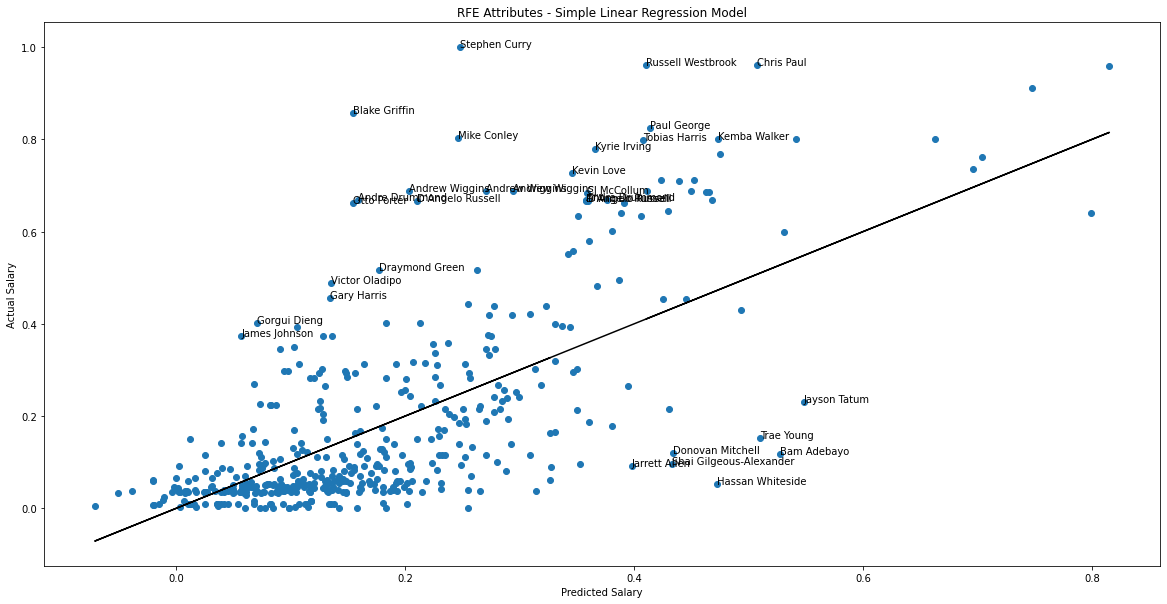

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(y_salary_compare['Predicted'],y_salary_compare['Predicted'], color = 'black')
plt.scatter(y_salary_compare['Predicted'], y_salary_compare['Actual'])
plt.ylabel('Actual Salary')
plt.xlabel('Predicted Salary')
plt.title('RFE Attributes - Simple Linear Regression Model')
#for i in range(df4.shape[0]):
    #plt.text(x=df4.Predicted[i],y=df4.Actual[i],s=df4.player[i])

for i in range(df3.shape[0]):
  plt.text(x=df3.Predicted[i],y=df3.Actual[i],s=df3.player[i])

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


# create scalecr
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

lin_model = LinearRegression()

lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(x_test)

score = lin_model.score(x_test, y_test)
print(score)
y_salary_compare =pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
y_salary_compare.head()

0.3976884272875484


,Actual,Predicted
0,0.688100,0.386728
1,0.118947,0.523370
2,0.558057,0.302466
4,0.072388,0.121547
5,0.059185,0.183320


In [ ]:
y_score = lin_model.score(y_test, y_pred)

### **Linear Regression - Correlation Matrix**

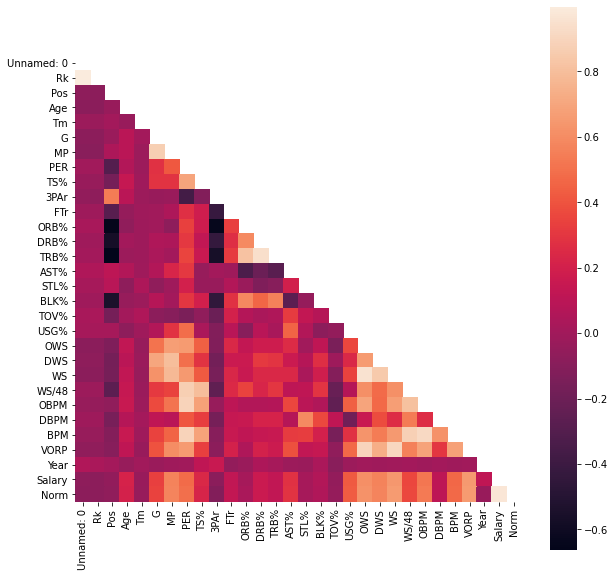

In [ ]:
corr = pt1.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (10,10))
sns.heatmap(corr, mask = mask, square = True)

In [ ]:
corr1 = pd.DataFrame(corr.loc[corr['Norm']>0.4])

list_features_corr = corr1.index.values
print(list_features_corr)

['MP' 'PER' 'USG%' 'OWS' 'DWS' 'WS' 'OBPM' 'BPM' 'VORP' 'Salary' 'Norm']


In [ ]:
x_train.head()

,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Year
2,2,22,0,34,428,7.6,0.474,0.673,0.082,2.6,12.3,7.4,19.8,1.5,1.0,19.7,13.5,-0.1,0.2,0.1,0.011,-3.8,-0.5,-4.3,-0.2,19
3,0,25,20,80,2669,18.5,0.591,0.002,0.361,14.7,14.8,14.7,6.6,2.0,2.4,12.6,16.4,5.1,4.0,9.1,0.163,0.7,0.4,1.1,2.1,19
4,0,21,15,82,1913,17.9,0.623,0.031,0.465,9.2,24.0,16.6,14.2,1.8,3.0,17.1,15.8,3.4,3.4,6.8,0.171,-0.4,2.2,1.8,1.8,19
7,0,33,26,81,2687,22.9,0.576,0.032,0.312,10.3,19.8,15.1,11.6,0.8,3.4,8.8,26.9,6.4,2.9,9.3,0.167,2.4,-0.6,1.8,2.6,19
9,4,23,29,38,416,7.5,0.516,0.556,0.337,0.8,5.1,3.0,8.9,0.7,1.1,13.9,24.4,-0.4,0.4,0.0,0.002,-4.2,-2.1,-6.3,-0.5,19


In [ ]:
'''Extracted correlated'''
#train_corr = pt1[['MP','OWS','DWS','WS','VORP']]
x_train = x_train[['MP', 'PER', 'USG%', 'OWS', 'DWS' ,'WS' ,'OBPM', 'BPM', 'VORP']]
x_test = x_test[['MP', 'PER', 'USG%', 'OWS', 'DWS' ,'WS' ,'OBPM', 'BPM', 'VORP']]
y_train = pt1['Norm']
y_test = pt2['Norm']

In [ ]:




from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# create scalecr
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

lin_model = LinearRegression()

lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)


score = lin_model.score(X_test, y_test)
score

0.5013751326899993

In [ ]:
corr_compare = pd.DataFrame({'actual': y_test, 'predicted': y_pred, 'player': pt2.Player, 'error': abs(y_test-y_pred)})

In [ ]:
corr_compare.head()

,actual,predicted,player,error
0,0.688100,0.357649,Steven Adams,0.330452
1,0.118947,0.503398,Bam Adebayo,0.384450
2,0.558057,0.341514,LaMarcus Aldridge,0.216543
4,0.072388,0.115157,Nickeil Alexander-Walker,0.042768
5,0.059185,0.141671,Grayson Allen,0.082486


In [ ]:
df5 = corr_compare.loc[corr_compare.error >= 0.3]
df5 = df5.reset_index(drop = True)
print(df5)

#df6 = corr_compare.loc[corr_compare.predicted >= 0.5]
#df6 = df6.reset_index(drop = True)
#print(df6)

      actual  predicted                   player     error
0   0.688100   0.357649             Steven Adams  0.330452
1   0.118947   0.503398              Bam Adebayo  0.384450
2   0.802256   0.262533              Mike Conley  0.539724
3   1.000000   0.228253            Stephen Curry  0.771747
4   0.401979   0.080541             Gorgui Dieng  0.321438
5   0.668547   0.350189           Andre Drummond  0.318358
6   0.668547   0.155245           Andre Drummond  0.513302
7   0.824306   0.438065              Paul George  0.386241
8   0.096296   0.444662  Shai Gilgeous-Alexander  0.348367
9   0.517295   0.164320           Draymond Green  0.352974
10  0.855943   0.165143            Blake Griffin  0.690800
11  0.798925   0.426610            Tobias Harris  0.372315
12  0.778033   0.351383             Kyrie Irving  0.426649
13  0.726829   0.362845               Kevin Love  0.363984
14  0.120808   0.485000         Donovan Mitchell  0.364192
15  0.488300   0.151476           Victor Oladipo  0.3368

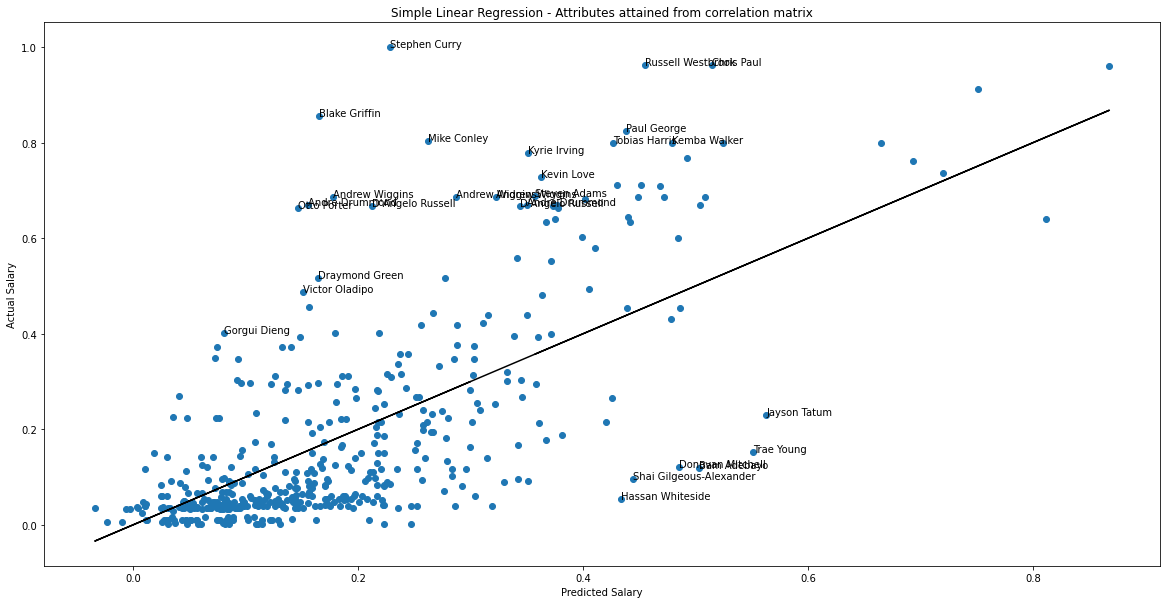

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(corr_compare['predicted'],corr_compare['predicted'], color = 'black')
plt.scatter(corr_compare['predicted'], corr_compare['actual'])
plt.ylabel('Actual Salary')
plt.xlabel('Predicted Salary')
plt.title('Simple Linear Regression - Attributes attained from correlation matrix')
for i in range(df5.shape[0]):
   plt.text(x=df5.predicted[i],y=df5.actual[i],s=df5.player[i])

#for i in range(df6.shape[0]):
   #plt.text(x=df6.predicted[i],y=df6.actual[i],s=df6.player[i])

### **Random Forest Regressor**

In [ ]:
#Random Forest Regressor (RFE Features)

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler



# create scalecr
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
# Instantiate model with 1000 decision trees
#rf = RandomForestRegressor(n_estimators = 200)
rf = RandomForestRegressor(max_depth = 10, random_state = 42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


score = rf.score(X_test, y_test )
print(score) #RFE

0.4921119786943316


In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler



# create scalecr
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
# Instantiate model with 1000 decision trees
#rf = RandomForestRegressor(n_estimators = 200)
rf = RandomForestRegressor(max_depth = 10, random_state = 42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


score = rf.score(X_test, y_test )


In [ ]:
score #Correlatin Matrix attributes

0.49450036672786896

In [ ]:
print(score) #score for all attributes

0.5039988683149506


In [ ]:
rf.fit(x_train_1, y_train) #Website Attributes
score = rf.score(x_test_1, y_test)
score

0.3893425176086171

In [ ]:
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.09 degrees.


In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.08975246112589956
Mean Squared Error: 0.017574441022987913
Root Mean Squared Error: 0.1325686275971352


In [ ]:
import matplotlib.pyplot as plt
# Dataframe with predictions and dates
#predictions_data = pd.DataFrame(data = {'curren salary': test_dates, 'prediction': predictions})
# Plot the actual values
df = pd.DataFrame({'y_actual': y_test,'y_pred': y_pred, 'player': pt2['Player'], 'error': abs(y_test-y_pred)})
#print(df)
#sns.scatterplot(df['y_pred'], df['y_actual'], sizes = 10)
#sns.lineplot(df['y_pred'],df['y_pred'], palette='set1')


 

In [ ]:
df1 = df.loc[df.error >= 0.3]
df1 = df1.reset_index(drop = True)
print(df1) #RFE

#df2 = df.loc[df.y_pred >= 0.5]
#df2 = df2.reset_index(drop = True)
#print(df2)


    y_actual    y_pred                   player     error
0   0.118947  0.550037              Bam Adebayo  0.431090
1   0.802256  0.218278              Mike Conley  0.583978
2   1.000000  0.095525            Stephen Curry  0.904475
3   0.401979  0.083521             Gorgui Dieng  0.318458
4   0.668547  0.283185           Andre Drummond  0.385362
5   0.668547  0.298927           Andre Drummond  0.369620
6   0.668547  0.111859           Andre Drummond  0.556688
7   0.188336  0.500737             De'Aaron Fox  0.312401
8   0.096296  0.514692  Shai Gilgeous-Alexander  0.418396
9   0.855943  0.108159            Blake Griffin  0.747784
10  0.798925  0.486416            Tobias Harris  0.312508
11  0.118707  0.422385             Jaxson Hayes  0.303678
12  0.639440  0.273998               Al Horford  0.365442
13  0.059637  0.362250            Dwight Howard  0.302613
14  0.120808  0.485535         Donovan Mitchell  0.364727
15  0.488300  0.120137           Victor Oladipo  0.368163
16  0.961691  

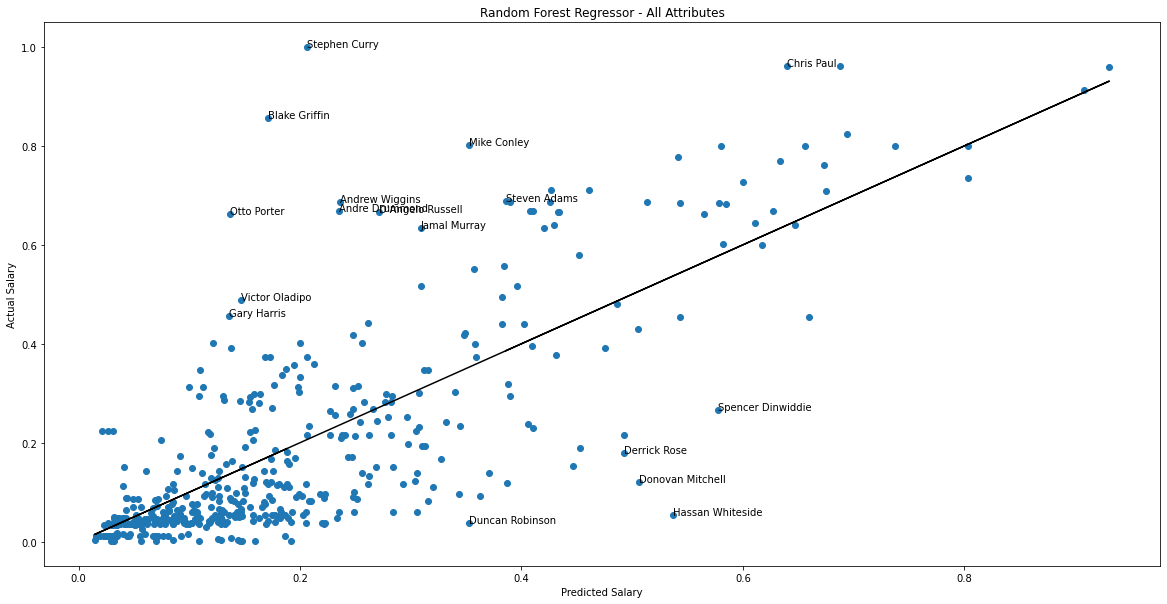

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(df['y_pred'],df['y_pred'], color = 'black')
plt.scatter(df['y_pred'], df['y_actual'])
plt.ylabel('Actual Salary')
plt.xlabel('Predicted Salary')
plt.title('Random Forest Regressor - All Attributes')
for i in range(df1.shape[0]):
    plt.text(x=df1.y_pred[i],y=df1.y_actual[i],s=df1.player[i])
    #plt.text(x=df2.y_pred[i],y=df2.y_actual[i],s=df2.player[i])

# Insert EDA on 5 years data

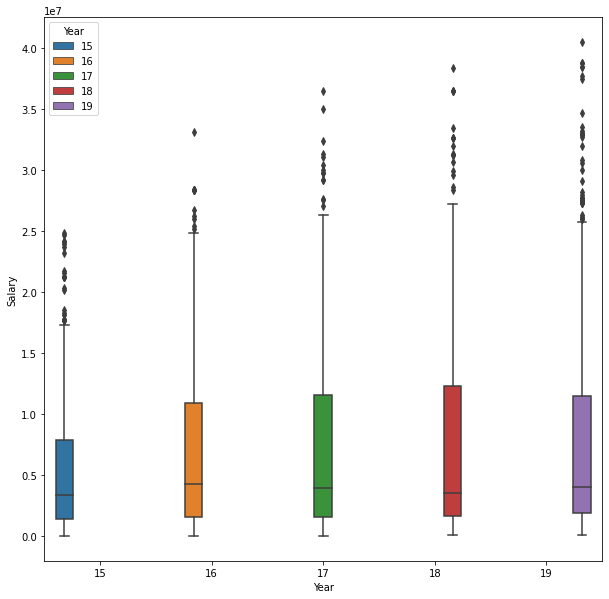

In [ ]:

plt.figure(figsize = (10,10))
sns.boxplot(x = pt1['Year'], y = pt1['Salary'], hue = pt1.Year)

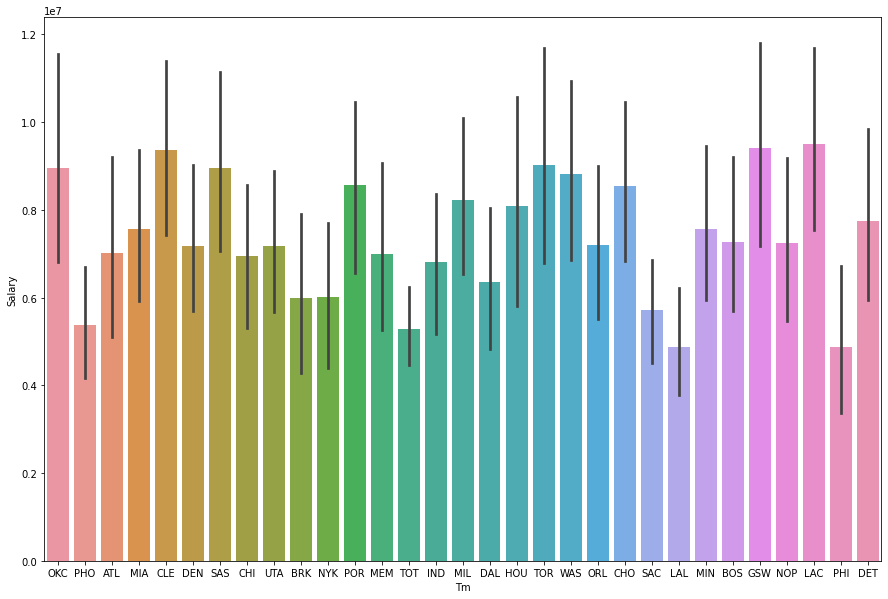

In [ ]:

plt.figure(figsize = (15,10))
sns.barplot(x = pt1.Tm, y = pt1['Salary'])

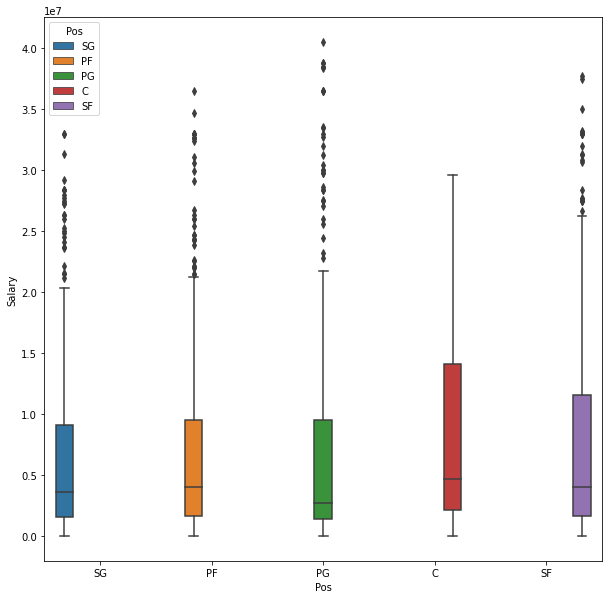

In [ ]:

plt.figure(figsize = (10,10))
sns.boxplot(x = pt1['Pos'], y = pt1['Salary'], hue = pt1.Pos)

In [ ]:
num = pt1.select_dtypes('number').drop(columns = ['Norm','Salary'])
g = sns.FacetGrid(data=num)
g.map(plt.dist,'age')